A lot of people say that Paso Robles is the next Napa, so this study looks at how similar they really are.

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
%matplotlib inline

Question 1: Napa Cabernet are some of the most expensive grapes on the market in the US. How do Cabernet grapes compare in price?

In [418]:
"""cost_df = pd.read_csv('Cost Per Ton.csv', index_col=0).loc[:,'2000':]"""
cost_df = pd.read_csv('Cost per Ton 2.csv')
cost_df.shape
print(cost_df)

    Year     Napa  Paso Robles
0   2000  3168.33      1323.62
1   2001  3728.56      1314.69
2   2002  4020.64      1229.38
3   2003  4010.85      1075.67
4   2004  3948.16       924.82
5   2005  3970.07       833.08
6   2006  4126.26       892.90
7   2007  4302.49       912.27
8   2008  4688.78       974.17
9   2009  4772.84      1031.13
10  2010  4453.09       965.18
11  2011  4660.36      1119.28
12  2012  5059.96      1295.77
13  2013  5473.94      1377.55
14  2014  5923.36      1464.62
15  2015  6288.52      1545.02
16  2016  6830.22      1585.56


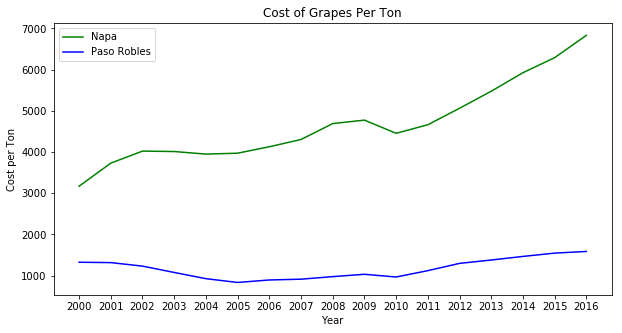

In [419]:
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
plt.plot(cost_df['Paso Robles'], color = 'blue')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

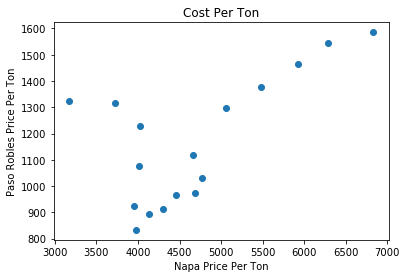

In [420]:
plt.scatter(x = cost_df['Napa'], y = cost_df['Paso Robles'])
plt.xlabel('Napa Price Per Ton')
plt.ylabel('Paso Robles Price Per Ton')
plt.title('Cost Per Ton')

plt.show()

Ttest_indResult(statistic=14.406484677914404, pvalue=2.5982883050490898e-11)


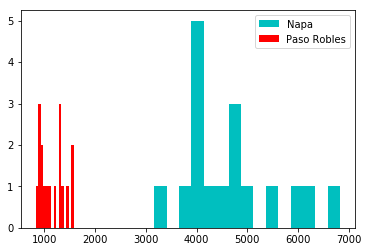

In [421]:
Napa = cost_df['Napa']
Paso = cost_df['Paso Robles']
plt.hist(Napa, bins=15, color='c', label='Napa')
plt.hist(Paso, bins=15, color='r', label='Paso Robles')
plt.legend(loc='upper right') 
print(ttest_ind(Napa, Paso, equal_var=False))
plt.show()

In [422]:
"""years = cost_df['2000':'2016']
y_pos = np.arange(len(years))

plt.bar(cost_df['Napa'], y_pos, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Cost Per Ton')"""
"""region_types = Counter(cost_df['Region'])
region_list = sorted(region_types.items(), key=lambda pair: pair[1])
keys = [x[0] for x in region_list]
y_pos = np.arange(len(keys))
types = [t[1] for t in region_list]
plt.figure(figsize=(10,25))
plt.barh(y_pos, types, alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Cost per ton of grapes')
plt.title('Cost Per Ton of Cabernet Grapes in Napa and Paso Robles')"""
 
"""plt.figure(figsize=(10, 5))
years = cost_df['2000':'2016']
regions = cost_df.index
x_pos = np.arange(17)
plt.xticks(x_pos, years)
y_pos =

plt.plot(cost_df['Napa'], color = 'green', use_index=False)
plt.xlabel('Years')
plt.ylabel('Dollars per Ton')
plt.title('Cost per ton by region')

plt.show()"""
         

"plt.figure(figsize=(10, 5))\nyears = cost_df['2000':'2016']\nregions = cost_df.index\nx_pos = np.arange(17)\nplt.xticks(x_pos, years)\ny_pos =\n\nplt.plot(cost_df['Napa'], color = 'green', use_index=False)\nplt.xlabel('Years')\nplt.ylabel('Dollars per Ton')\nplt.title('Cost per ton by region')\n\nplt.show()"

Question 2: Are Paso Robles vineyard land prices trending up toward Napa land prices?

In [423]:
land_df = pd.read_csv('Land Prices.csv')
land_df.shape
print(land_df)

    Year  Napa Prime Low  Napa Prime High  Napa Secondary Low  \
0   2003             NaN           180000                 NaN   
1   2004             NaN           180000                 NaN   
2   2005             NaN           200000                 NaN   
3   2006             NaN           275000                 NaN   
4   2007        225000.0           285000            130000.0   
5   2008        225000.0           300000            115000.0   
6   2009        225000.0           300000            115000.0   
7   2010        225000.0           300000            100000.0   
8   2011        225000.0           300000             90000.0   
9   2012        200000.0           300000            100000.0   
10  2013        200000.0           300000            100000.0   
11  2014        220000.0           320000            100000.0   
12  2015        250000.0           370000            120000.0   

    Napa Secondary High  Napa Outlying Low  Napa Outlying High  Paso Low  \
0            

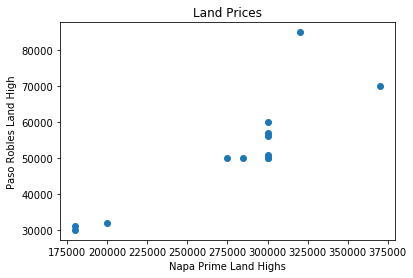

In [424]:
napa_high = land_df['Napa Prime High']
paso_high = land_df['Paso High']
plt.scatter(x = napa_high, y = paso_high)
plt.xlabel('Napa Prime Land Highs')
plt.ylabel('Paso Robles Land High')
plt.title('Land Prices')

plt.show()

Ttest_indResult(statistic=-13.883594876182109, pvalue=1.7350150647847125e-09)


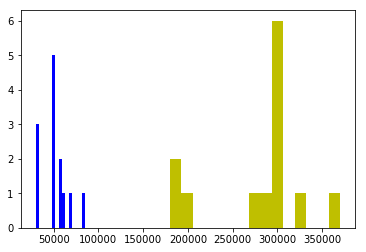

In [425]:
napa = land_df['Napa Prime High']
paso = land_df['Paso High']
plt.hist(napa, bins=15, color='y', label='Napa')
plt.hist(paso, bins=15, color='b', label='Paso Robles')
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

Question 3: Does Paso Robles have the focus on Cabernet as Napa does?

In [426]:
napa_acre_df = pd.read_csv('Napa Acres.csv')
slo_acre_df = pd.read_csv('SLO Acres.csv')
napa_acre_df.shape
slo_acre_df.shape
print(napa_acre_df, slo_acre_df)

               Variety    2008 and Earlier  2009  2010  2011  2012  2013  \
0            AGLIANICO                   1     0     0     0     0     0   
1    ALICANTE BOUSCHET                   1     0     0     0     1     0   
2              BARBERA                  10     0     0     0     0     0   
3       CABERNET FRANC                1032    25    36     6     2    13   
4   CABERNET SAUVIGNON               17834   503   209   312   429   270   
5            CARIGNANE                   4     0     0     0     0     0   
6            CARMENERE                   5     0     0     0     0     2   
7             CHARBONO                  46     2     0     0     0     0   
8              CINSAUT                   1     0     0     0     0     0   
9             DOLCETTO                   7     0     0     0     0     0   
10       GAMAY  (NAPA)                  21     0     0     0     0     0   
11            GRENACHE                  21     4     0     9     0     2   
12          

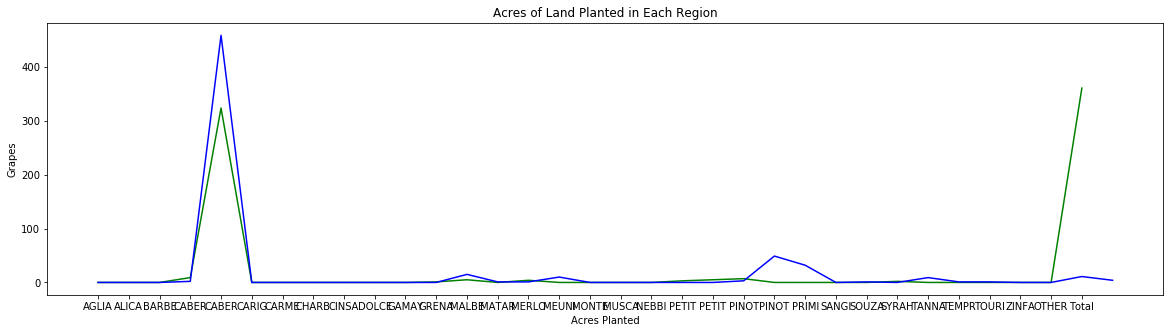

In [427]:
plt.figure(figsize=(20, 5))
plt.plot(napa_acre_df['2016'], color = 'green')
plt.plot(slo_acre_df['2016'], color = 'blue')
keys = [x[0:5] for x in napa_acre_df['Variety']]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.ylabel('Grapes')
plt.xlabel('Acres Planted')
plt.title('Acres of Land Planted in Each Region')

plt.show()

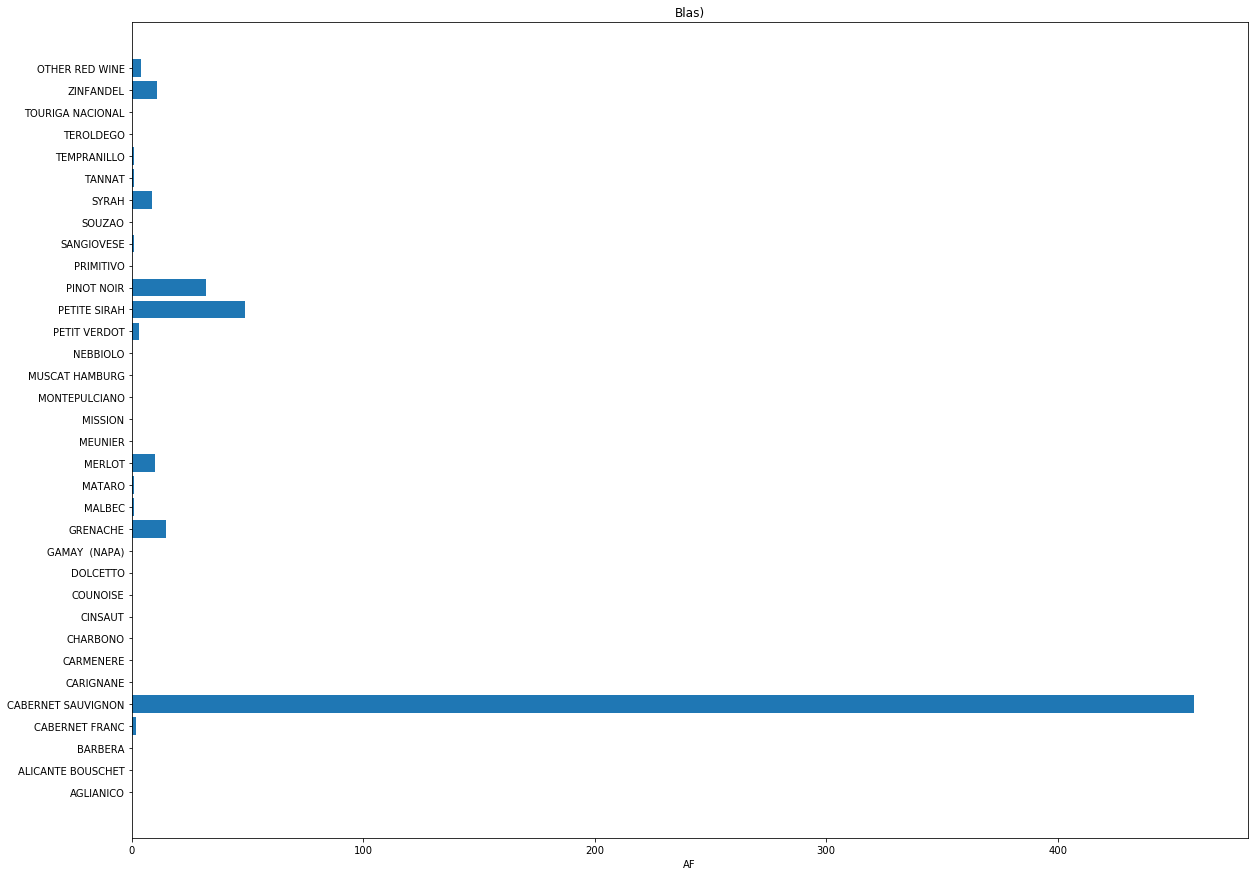

In [428]:
plt.figure(figsize=(20, 15))
grapes = slo_acre_df['Variety']
acres = slo_acre_df['2016']
acres2 = napa_acre_df['2016']
xs = [i + 0.5 for i, _ in enumerate(grapes)]
plt.barh(xs, acres)
plt.xlabel('AF')
plt.title('Blas)')
plt.yticks([i + 0.5 for i, _ in enumerate(grapes)], grapes)
plt.show()

Ttest_indResult(statistic=-0.21423119069448252, pvalue=0.83104197499415133)


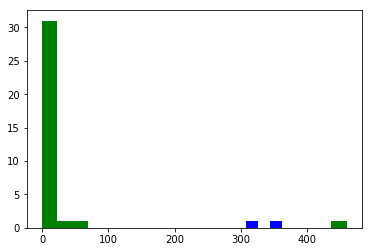

In [429]:
napa = napa_acre_df['2016']
paso = slo_acre_df['2016']
plt.hist(napa, bins=20, color='b', label='Napa')
plt.hist(paso, bins=20, color='g', label='Paso Robles')
print(ttest_ind(paso, napa, equal_var=False))
plt.show()

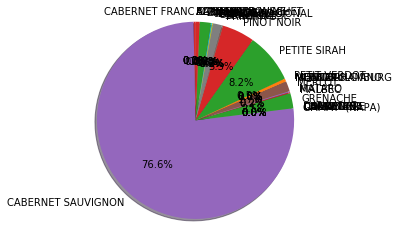

In [430]:
labels = slo_acre_df['Variety']
sizes = slo_acre_df['2016']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()